In [1]:
# Cell 1: Copy‐in your data‐building functions (or save them as `model/data_builder.py` and import)
import pandas as pd
import numpy as np
import requests
import cv2

from model import (
    SETINFO,
    INITIAL_WIDTH,
    INITIAL_HEIGHT,
    HARD_CODED_WIDTH,
    HARD_CODED_HEIGHT,
    REDUCED_SET,
)

from model.util import download_image, crop_corners, make_record, create_dataset, reduce_dataset, reduce_side


In [ ]:
# Cell 2: Build the full corner‐crop DataFrame
df_full = create_dataset()
print("Total records:", len(df_full))


▶️ Processing set dv1 (21 cards)
▶️ Processing set swsh9 (186 cards)
▶️ Processing set swsh45 (73 cards)
▶️ Processing set swsh6 (233 cards)
▶️ Processing set swsh12pt5 (160 cards)
▶️ Processing set xy1 (146 cards)
▶️ Processing set xy2 (110 cards)
⚠️ Failed to fetch https://images.pokemontcg.io/xy2/110_hires.png
▶️ Processing set xy3 (114 cards)
⚠️ Failed to fetch https://images.pokemontcg.io/xy3/114_hires.png
▶️ Processing set g1 (117 cards)
⚠️ Failed to fetch https://images.pokemontcg.io/g1/84_hires.png
⚠️ Failed to fetch https://images.pokemontcg.io/g1/85_hires.png
⚠️ Failed to fetch https://images.pokemontcg.io/g1/86_hires.png
⚠️ Failed to fetch https://images.pokemontcg.io/g1/87_hires.png
⚠️ Failed to fetch https://images.pokemontcg.io/g1/88_hires.png
⚠️ Failed to fetch https://images.pokemontcg.io/g1/89_hires.png
⚠️ Failed to fetch https://images.pokemontcg.io/g1/90_hires.png
⚠️ Failed to fetch https://images.pokemontcg.io/g1/91_hires.png
⚠️ Failed to fetch https://images.pokemo

KeyboardInterrupt: 

In [5]:
df_full.head(10)

,corner,position,set_id,set_name
0,"[[221, 221, 221, 221, 221, 221, 221, 221, 221,...",left,no,no
1,"[[83, 82, 82, 85, 83, 79, 82, 82, 79, 82, 90, ...",right,dv1,Dragon Vault
2,"[[221, 221, 221, 221, 221, 221, 221, 221, 221,...",left,no,no
3,"[[83, 82, 82, 85, 83, 79, 82, 82, 79, 82, 90, ...",right,dv1,Dragon Vault
4,"[[221, 221, 221, 221, 221, 221, 221, 221, 221,...",left,no,no
5,"[[83, 82, 82, 85, 83, 79, 82, 82, 79, 82, 90, ...",right,dv1,Dragon Vault
6,"[[221, 221, 221, 221, 221, 221, 221, 221, 221,...",left,no,no
7,"[[83, 82, 82, 85, 83, 79, 82, 82, 79, 82, 90, ...",right,dv1,Dragon Vault
8,"[[221, 221, 221, 221, 221, 221, 221, 221, 221,...",left,no,no
9,"[[83, 82, 82, 85, 83, 79, 82, 82, 79, 82, 90, ...",right,dv1,Dragon Vault


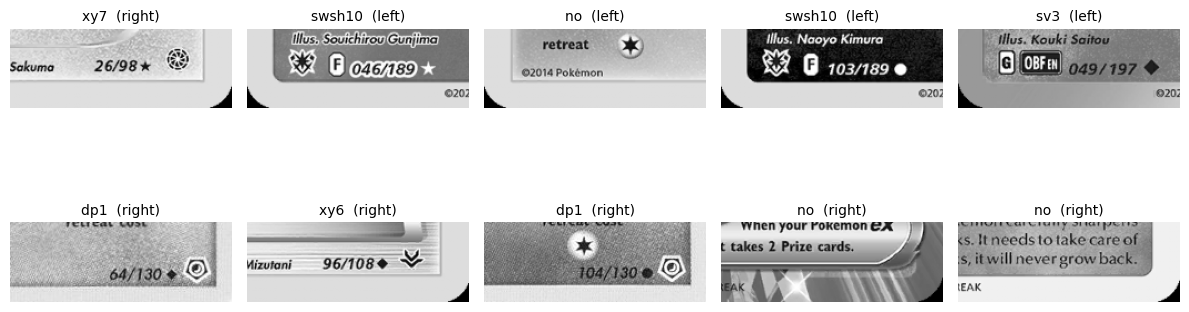

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load the full dataset you created
#    (or call create_dataset() to get the DataFrame directly)
df = pd.read_json("raw_data/full_corners.json")

# 2) Convert each “corner” from list back into a NumPy array
df['corner'] = df['corner'].apply(lambda lst: np.array(lst, dtype=np.uint8))

# 3) Sample 10 random examples
sample = df.sample(10, random_state=42).reset_index(drop=True)

# 4) Plot them in a 2×5 grid
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, (_, row) in zip(axes.flat, sample.iterrows()):
    ax.imshow(row['corner'], cmap='gray')
    ax.set_title(f"{row['set_id']}  ({row['position']})", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [3]:
# Cell 3: Persist the full JSON (so you can re‐use without re‐downloading)
df_full.to_json("raw_data/full_corners.json", orient="records")


In [8]:
import os

# Make sure the target directory exists (adjust the path if needed)
os.makedirs("../../raw_data", exist_ok=True)


In [11]:
# Cell 4: Create the *reduced* left/right datasets for balanced training
reduce_dataset("Pavel151515/Pokemon/raw_data/full_corners.json")
# that writes:
#   raw_data/dict_reduceddataset_left.json
#   raw_data/dict_reduceddataset_right.json


FileNotFoundError: File Pavel151515/Pokemon/raw_data/full_corners.json does not exist

In [ ]:
import os
# from wherever your notebook is running (project root?), this makes ../../raw_data
os.makedirs(os.path.join(os.getcwd(), "..", "..", "raw_data"), exist_ok=True)


In [10]:
# now re‐run
from model.util import reduce_dataset
reduce_dataset("raw_data/full_corners.json")


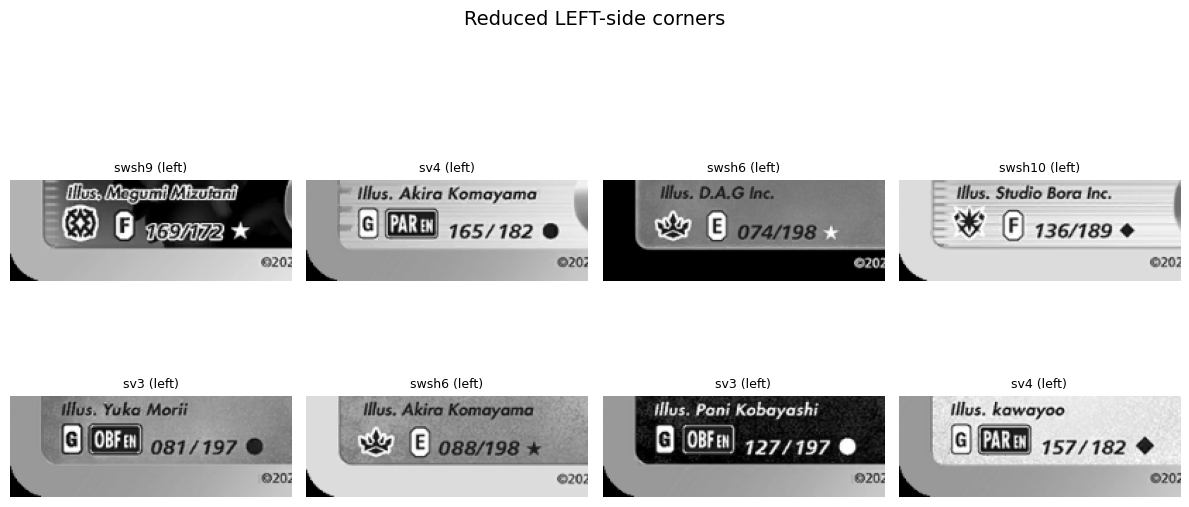

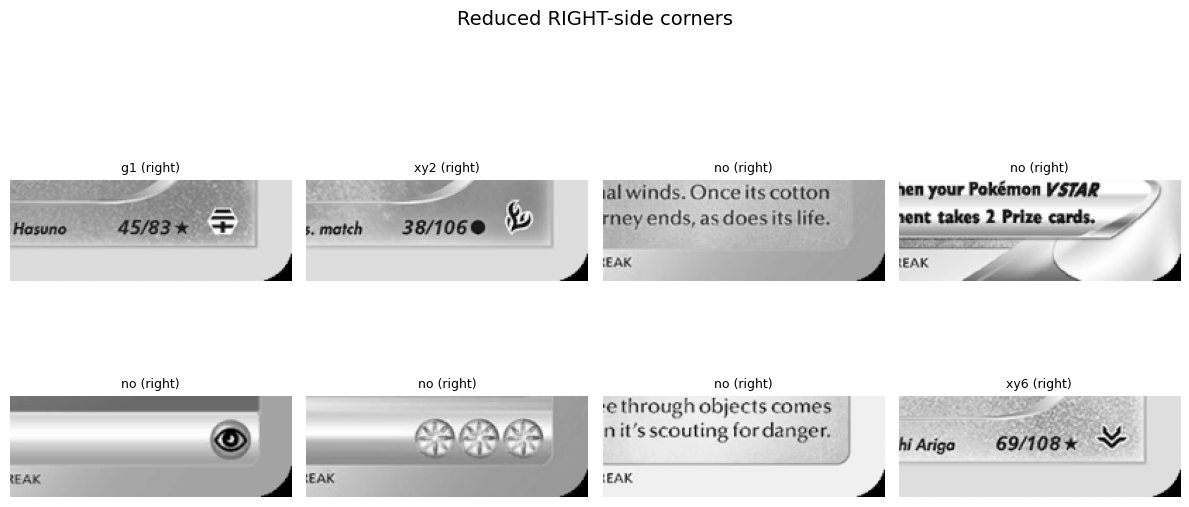

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load left- and right-side datasets
df_left  = pd.read_json("raw_data_reduced/dict_reduceddataset_left.json")
df_right = pd.read_json("raw_data_reduced/dict_reduceddataset_right.json")

# 2) Rehydrate the image arrays
for df in (df_left, df_right):
    df['corner'] = df['corner'].apply(lambda lst: np.array(lst, dtype=np.uint8))

# 3) Helper to plot a few samples from any df
def show_samples(df, title, n=8, ncols=4):
    sample = df.sample(n, random_state=0).reset_index(drop=True)
    nrows = (n + ncols - 1)//ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*3))
    axes = axes.flatten()
    for ax, (_, row) in zip(axes, sample.iterrows()):
        ax.imshow(row['corner'], cmap='gray')
        ax.set_title(f"{row['set_id']} ({row['position']})", fontsize=9)
        ax.axis('off')
    # blank out any extra axes
    for ax in axes[len(sample):]:
        ax.axis('off')
    fig.suptitle(title, y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()

# 4) Peek at each
show_samples(df_left,  "Reduced LEFT-side corners")
show_samples(df_right, "Reduced RIGHT-side corners")


In [1]:
from othermodel.augmentation2 import get_augment_data

# load & augment the LEFT-side dataset
df_left_aug  = get_augment_data("raw_data_reduced/dict_reduceddataset_left.json")
# load & augment the RIGHT-side dataset
df_right_aug = get_augment_data("raw_data_reduced/dict_reduceddataset_right.json")


In [ ]:
df_right_aug.describe()

In [3]:
import pandas as pd
df_augmented = pd.concat([df_left_aug, df_right_aug], ignore_index=True)


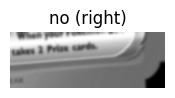

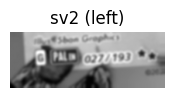

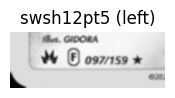

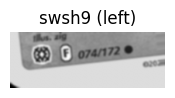

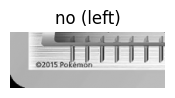

In [4]:
import matplotlib.pyplot as plt

# show 5 random augmented corners
sample = df_augmented.sample(5, random_state=42)
for i, row in sample.iterrows():
    img = row["corner"]  # a H×W (uint8) array
    plt.figure(figsize=(2,2))
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"{row['set_id']} ({row['position']})")
    plt.axis("off")
plt.show()


In [5]:
# this will load, augment, shuffle, split, and train
from model.modelling import symbols_model

# train on left+right combined
df_augmented.to_json("raw_data/augmented_all.json", orient="records")
model, history, cm, le = symbols_model("raw_data/augmented_all.json")


Epoch 1/20


/Users/pavelsingh/.pyenv/versions/3.10.6/envs/Pokemon/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


481/482 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.5840 - loss: 1.3909

482/482 ━━━━━━━━━━━━━━━━━━━━ 85s 175ms/step - accuracy: 0.5849 - loss: 1.3879 - val_accuracy: 0.2187 - val_loss: 3.0008
Epoch 2/20
481/482 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9971 - loss: 0.0406

482/482 ━━━━━━━━━━━━━━━━━━━━ 84s 173ms/step - accuracy: 0.9971 - loss: 0.0405 - val_accuracy: 0.9970 - val_loss: 0.0356
Epoch 3/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 90s 187ms/step - accuracy: 0.9998 - loss: 0.0103 - val_accuracy: 0.9927 - val_loss: 0.1437
Epoch 4/20
482/482 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9996 - loss: 0.0092

482/482 ━━━━━━━━━━━━━━━━━━━━ 85s 176ms/step - accuracy: 0.9996 - loss: 0.0092 - val_accuracy: 0.9982 - val_loss: 0.0277
Epoch 5/20
481/482 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9984 - loss: 0.0128

482/482 ━━━━━━━━━━━━━━━━━━━━ 82s 170ms/step - accuracy: 0.9984 - loss: 0.0128 - val_accuracy: 0.9988 - val_loss: 0.0103
Epoch 6/20
150/482 ━━━━━━━━━━━━━━━━━━━━ 57s 172ms/step - accuracy: 0.9991 - loss: 0.0053

KeyboardInterrupt: 

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Sequential, callbacks
from sklearn.preprocessing import LabelEncoder

from model.augmentation import load_corner_dataframe, make_tf_dataset
from model import HARD_CODED_WIDTH, HARD_CODED_HEIGHT


In [14]:
# load the reduced JSON (one side at a time, e.g. left)
df = load_corner_dataframe("raw_data_reduced/dict_reduceddataset_left.json")

# shuffle
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# encode labels 0…K-1
le = LabelEncoder()
df['label'] = le.fit_transform(df['set_id'])

# split 70/15/15
N = len(df)
n1 = int(0.7 * N)
n2 = int(0.85 * N)

df_train = df.iloc[:n1]
df_val   = df.iloc[n1:n2]
df_test  = df.iloc[n2:]

print("train / val / test:", len(df_train), len(df_val), len(df_test))


train / val / test: 1731 371 372


In [15]:
batch_size = 32

train_ds = make_tf_dataset(df_train, batch_size=batch_size, shuffle=True)
val_ds   = make_tf_dataset(df_val,   batch_size=batch_size, shuffle=False)
test_ds  = make_tf_dataset(df_test,  batch_size=batch_size, shuffle=False)


In [17]:
# 1) Point to your reduced JSON for the left‐corner data
LEFT_JSON  = "raw_data_reduced/dict_reduceddataset_left.json"
RIGHT_JSON = "raw_data_reduced/dict_reduceddataset_right.json"

# 2) Import and run the trainer
from model.modelling import symbols_model

# Train on left corners
model_left, history_left, cm_left, le_left = symbols_model(LEFT_JSON,
                                                          batch_size=32,
                                                          epochs=20)
# You’ll see training/validation loss & accuracy printed, plus a confusion matrix and full classification report.

# If you want a separate model for right corners:
model_right, history_right, cm_right, le_right = symbols_model(RIGHT_JSON,
                                                              batch_size=32,
                                                              epochs=20)


Epoch 1/20


/Users/pavelsingh/.pyenv/versions/3.10.6/envs/Pokemon/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.6852 - loss: 1.1549

55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.6916 - loss: 1.1339 - val_accuracy: 0.1321 - val_loss: 7.2421
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 1.0000 - loss: 0.0560 - val_accuracy: 0.1321 - val_loss: 9.8832
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 0.1321 - val_loss: 9.7504
Epoch 4/20
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 1.0000 - loss: 0.0158

55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 1.0000 - loss: 0.0158 - val_accuracy: 0.1617 - val_loss: 4.5127
Epoch 5/20
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 1.0000 - loss: 0.0119

55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 1.0000 - loss: 0.0118 - val_accuracy: 0.2776 - val_loss: 2.3665
Epoch 6/20
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 1.0000 - loss: 0.0101

55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.3881 - val_loss: 2.2208
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - accuracy: 0.9881 - loss: 0.0856 - val_accuracy: 0.1321 - val_loss: 33.5866
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.9986 - loss: 0.0102 - val_accuracy: 0.1429 - val_loss: 30.0313
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.9699 - loss: 0.1601 - val_accuracy: 0.1914 - val_loss: 7.6649
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Classification Report:
              precision    recall  f1-score   support

          no       0.46      0.76      0.57        62
         sm4       1.00      0.12      0.21        17
         sv2       0.22      0.33      0.26        49
         sv3       0.59      0.54      0.57        35
      sv3pt5       0.92      0.39      0.55        31
         sv4       0.63      0.97      0.77        39
      swsh10       0.50      0.03      0.05        

/Users/pavelsingh/.pyenv/versions/3.10.6/envs/Pokemon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pavelsingh/.pyenv/versions/3.10.6/envs/Pokemon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pavelsingh/.pyenv/versions/3.10.6/envs/Pokemon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Epoch 1/20


/Users/pavelsingh/.pyenv/versions/3.10.6/envs/Pokemon/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.4809 - loss: 1.8162

35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.4905 - loss: 1.7797 - val_accuracy: 0.0726 - val_loss: 6.8856
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.9448 - loss: 0.2904 - val_accuracy: 0.0726 - val_loss: 8.7925
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.9960 - loss: 0.0663 - val_accuracy: 0.0726 - val_loss: 9.0843
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9953 - loss: 0.0408 - val_accuracy: 0.0726 - val_loss: 8.2918
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Classification Report:
              precision    recall  f1-score   support

         dp1       0.00      0.00      0.00        15
         dp2       0.09      1.00      0.16        21
         dv1       0.00      0.00      0.00         1
          g1       0.00      0.00      0.00        10
          no       0.00      0.00      0.00        78
         xy1       0.00      0.00      0.00        18
         xy2       0.00      0.00      0.00        20
     

/Users/pavelsingh/.pyenv/versions/3.10.6/envs/Pokemon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pavelsingh/.pyenv/versions/3.10.6/envs/Pokemon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pavelsingh/.pyenv/versions/3.10.6/envs/Pokemon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh